Install all necessary modules for analysis

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


# minor pandas configuration
pd.options.display.max_rows = None
pd.options.display.max_columns = None

reading the data and display some few rows

In [3]:
df = pd.read_csv("./data/cab_rides.csv")

# i already know the dataset contains some data i dont new i will just go ahead and remove it
# if this is the first time am seeing this data i might have go deep into the data before i realise and remove it
df = df.loc[df['cab_type'] == 'Uber']
df.head()


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385663 entries, 12 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          385663 non-null  float64
 1   cab_type          385663 non-null  object 
 2   time_stamp        385663 non-null  int64  
 3   destination       385663 non-null  object 
 4   source            385663 non-null  object 
 5   price             330568 non-null  float64
 6   surge_multiplier  385663 non-null  float64
 7   id                385663 non-null  object 
 8   product_id        385663 non-null  object 
 9   name              385663 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 32.4+ MB


In [5]:
df.describe()
# from the data below our timestamp isnt in the right format for us to make sense out of it

,distance,time_stamp,price,surge_multiplier
count,385663.000000,3.856630e+05,330568.000000,385663.0
mean,2.191386,1.544046e+12,15.795343,1.0
std,1.178973,6.896209e+08,8.560300,0.0
min,0.020000,1.543204e+12,4.500000,1.0
25%,1.300000,1.543444e+12,9.000000,1.0
50%,2.170000,1.543737e+12,12.500000,1.0
75%,2.840000,1.544828e+12,21.500000,1.0
max,7.860000,1.545161e+12,89.500000,1.0


Data Cleaning and analysis

In [6]:
# convert the ms timestamp to actual  date time
# df['time_stamp'].dt.date
df['date']=pd.to_datetime(df['time_stamp'], unit='ms')
df['date'].head()

# as we can see the timestamp has been converted into a usable datetime for us

12   2018-11-30 22:13:01.179
13   2018-12-13 10:50:11.014
14   2018-12-13 19:15:03.935
15   2018-12-16 23:55:11.430
16   2018-12-14 00:40:07.961
Name: date, dtype: datetime64[ns]

We will try summing how many rows have a missing data in each feature point

In [7]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
date                    0
dtype: int64

from the data above we know there are no missing data but we will still go ahead and try and remove any missing data incase we miss something

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-30 22:13:01.179
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13 10:50:11.014
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13 19:15:03.935
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-16 23:55:11.430
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-14 00:40:07.961


In [11]:
# function to plot a bar chat based on the feature selected.
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

        name  counts
0      Black   55095
1  Black SUV   55096
2   UberPool   55091
3      UberX   55094
4     UberXL   55096
5        WAV   55096


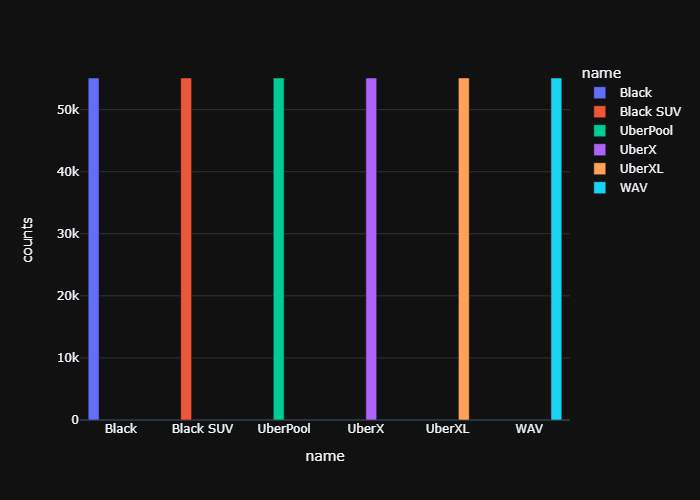

In [12]:
plot_bar('name')

In [13]:
plot_bar('date')

KeyboardInterrupt: 

In [16]:
pd[pd['name'] == 'Black']

TypeError: 'module' object is not subscriptable

                     source  counts
0                  Back Bay   27546
1               Beacon Hill   27377
2         Boston University   27552
3                    Fenway   27546
4        Financial District   27960
5          Haymarket Square   27533
6                 North End   27551
7             North Station   27250
8   Northeastern University   27550
9             South Station   27540
10         Theatre District   27671
11                 West End   27492


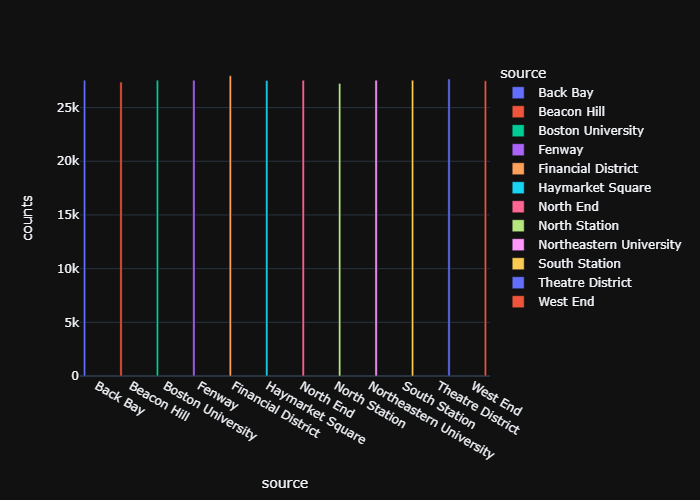

In [17]:
plot_bar('source')

                destination  counts
0                  Back Bay   27540
1               Beacon Hill   27376
2         Boston University   27557
3                    Fenway   27546
4        Financial District   27954
5          Haymarket Square   27558
6                 North End   27550
7             North Station   27251
8   Northeastern University   27546
9             South Station   27539
10         Theatre District   27653
11                 West End   27498


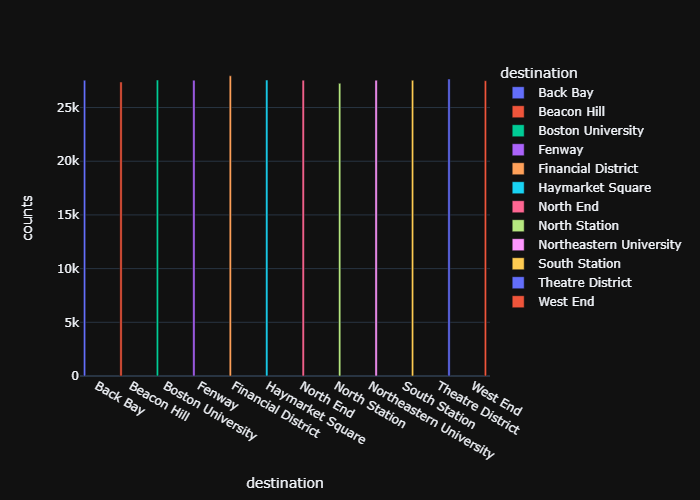

In [18]:
plot_bar('destination')


In [20]:
df.groupby(by=["destination","source"]).agg({'distance':'mean'})


distance
destination             source                           
Back Bay                Boston University        1.523772
                        Fenway                   1.513816
                        Haymarket Square         2.128475
                        North End                2.769815
                        Northeastern University  1.597101
                        South Station            3.016096
Beacon Hill             Boston University        2.798440
                        Fenway                   2.498329
                        Haymarket Square         1.106217
                        North End                1.884819
                        Northeastern University  2.620472
                        South Station            2.537390
Boston University       Back Bay                 1.389017
                        Beacon Hill              2.264604
                        Financial District       5.158975
                        North Station            3.007533
                        Theatre District         2.629523
                        West End                 2.791171
Fenway                  Back Bay                 1.340053
                        Beacon Hill              2.318035
                        Financial District       4.481838
                        North Station            3.047810
                        Theatre District         2.658633
                        West End                 2.844373
Financial District      Boston University        4.607315
                        Fenway                   4.348314
                        Haymarket Square         0.951219
                        North End                1.077490
                        Northeastern University  4.440289
                        South Station            0.594597
Haymarket Square        Back Bay                 2.417653
                        Beacon Hill              1.344228
                        Financial District       1.207612
                        North Station            0.588239
                        Theatre District         1.612680
                        West End                 0.730096
North End               Back Bay                 2.964969
                        Beacon Hill              1.808436
                        Financial District       1.204440
                        North Station            1.081513
                        Theatre District         1.581384
                        West End                 1.159203
North Station           Boston University        3.377213
                        Fenway                   3.072958
                        Haymarket Square         0.494184
                        North End                0.982975
                        Northeastern University  3.206077
                        South Station            2.004047
Northeastern University Back Bay                 1.168116
                        Beacon Hill              2.086346
                        Financial District       4.481199
                        North Station            3.292852
                        Theatre District         1.845922
                        West End                 3.087207
South Station           Back Bay                 3.627920
                        Beacon Hill              2.294886
                        Financial District       0.393399
                        North Station            2.044890
                        Theatre District         0.558960
                        West End                 2.018128
Theatre District        Boston University        2.856053
                        Fenway                   2.574311
                        Haymarket Square         1.179799
                        North End                1.423281
                        Northeastern University  2.050870
                        South Station            1.314596
West End                Boston University        3.055743
                        Fenway                 

In [21]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        13.217685
                        Fenway                   12.845317
                        Haymarket Square         17.170795
                        North End                18.526613
                        Northeastern University  12.595960
                        South Station            18.810889
Beacon Hill             Boston University        15.634904
                        Fenway                   15.341355
                        Haymarket Square         13.635035
                        North End                14.683354
                        Northeastern University  15.427937
                        South Station            15.201665
Boston University       Back Bay                 13.370518
                        Beacon Hill              16.497264
                        Financial District       22.670666
                        North Station            18.785556
                        Theatre District         17.492749
                        West End                 17.314547
Fenway                  Back Bay                 13.140293
                        Beacon Hill              16.041110
                        Financial District       21.490632
                        North Station            18.174563
                        Theatre District         16.952590
                        West End                 17.056108
Financial District      Boston University        24.333874
                        Fenway                   21.930574
                        Haymarket Square         12.986940
                        North End                12.926901
                        Northeastern University  21.785024
                        South Station            12.113081
Haymarket Square        Back Bay                 16.259235
                        Beacon Hill              13.315881
                        Financial District       12.663765
                        North Station            12.240132
                        Theatre District         13.531175
                        West End                 12.535861
North End               Back Bay                 18.804973
                        Beacon Hill              15.463183
                        Financial District       13.304094
                        North Station            12.594175
                        Theatre District         14.545207
                        West End                 13.157064
North Station           Boston University        18.073000
                        Fenway                   17.849338
                        Haymarket Square         12.352497
                        North End                12.817076
                        Northeastern University  18.667957
                        South Station            14.935554
Northeastern University Back Bay                 13.440711
                        Beacon Hill              16.312040
                        Financial District       21.109759
                        North Station            18.501075
                        Theatre District         14.894697
                        West End                 16.893690
South Station           Back Bay                 18.215909
                        Beacon Hill              16.387040
                        Financial District       12.133048
                        North Station            14.988797
                        Theatre District         13.801348
                        West End                 15.295861
Theatre District        Boston University        17.166176
                        Fenway                   16.763532
                        Haymarket Square         14.384641
                        North End                14.074304
                        Northeastern University  15.160065
                        South Station            12.590287
West End                Boston University 

In [22]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 89.5


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
164401,7.46,Uber,1543600381274,Northeastern University,Financial District,89.5,1.0,5374b432-8695-430c-8a43-da2b778137a4,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-11-30 17:53:01.274


In [23]:
df[df['price']==df.price.max()][['distance']]


,distance
164401,7.46


In [25]:
df.astype("category")

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-30 22:13:01.179
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13 10:50:11.014
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13 19:15:03.935
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-16 23:55:11.430
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-14 00:40:07.961
...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-01 23:53:05.534
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.534
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.534
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.534


In [55]:
new_df = df.drop(['id','time_stamp','date', 'cab_type', 'destination', 'source', 'id', 'product_id'],axis=1)

In [57]:
new_df.head(2)

,distance,price,surge_multiplier,name
12,1.11,12.0,1.0,UberXL
13,1.11,16.0,1.0,Black


<AxesSubplot: >

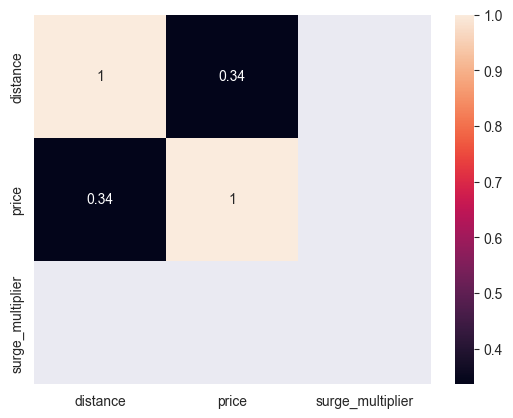

In [58]:
plt.figure()
sns.heatmap(new_df.corr(),annot=True)

In [59]:
le = preprocessing.LabelEncoder()

df_cat_bad_encode= new_df.copy()
for col in df_cat_bad_encode.select_dtypes(include='O').columns:
    df_cat_bad_encode[col]=le.fit_transform(df_cat_bad_encode[col])

In [60]:
df_cat_bad_encode.head()

,distance,price,surge_multiplier,name
12,1.11,12.0,1.0,4
13,1.11,16.0,1.0,0
14,1.11,7.5,1.0,3
15,1.11,7.5,1.0,5
16,1.11,26.0,1.0,1


<AxesSubplot: >

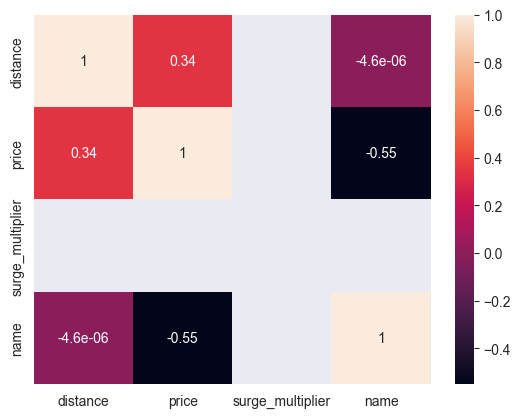

In [61]:
plt.figure()
sns.heatmap(df_cat_bad_encode.corr(),annot=True)

In [62]:
encoded_df = new_df.copy()
encoded_df.head()

,distance,price,surge_multiplier,name
12,1.11,12.0,1.0,UberXL
13,1.11,16.0,1.0,Black
14,1.11,7.5,1.0,UberX
15,1.11,7.5,1.0,WAV
16,1.11,26.0,1.0,Black SUV


In [63]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])

    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)

    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)

    if keep_first == False:
        new_data=new_data.iloc[:,1:]

    return new_data

In [64]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)

new_df_onehot.head()

,distance,price,surge_multiplier,name_Black,name_Black SUV,name_UberPool,name_UberX,name_UberXL,name_WAV
12,1.11,12.0,1.0,0,0,0,0,1,0
13,1.11,16.0,1.0,1,0,0,0,0,0
14,1.11,7.5,1.0,0,0,0,1,0,0
15,1.11,7.5,1.0,0,0,0,0,0,1
16,1.11,26.0,1.0,0,1,0,0,0,0


<AxesSubplot: >

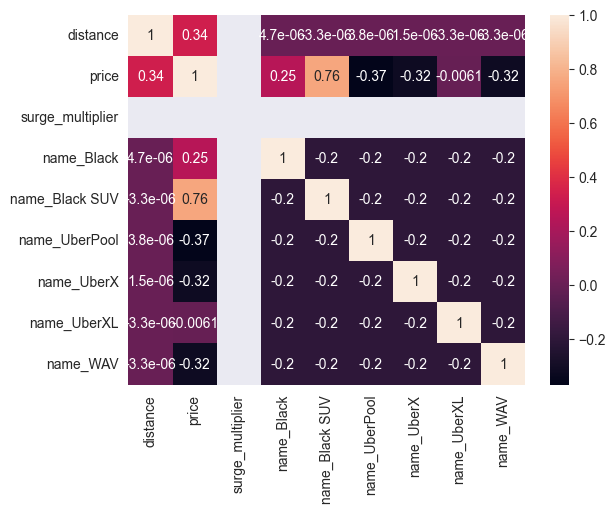

In [65]:
plt.figure()
sns.heatmap(new_df_onehot.corr(),annot=True)

In [66]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [68]:
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9203185563429029

In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.818176508317534
2.412089655945138


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

# regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# regressor.fit(X,y)

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [400],
                'random_state': [0]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_best_model_using_gridsearchcv(X,y)